In [23]:
import numpy as np
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import copy
from pprint import pprint
import pylab
import sys
import os
%matplotlib inline

In [2]:
#data = fits.open('testapertureHSC.fits')
#data = fits.open('test2AllQuasars.fits')  
data = fits.open('QTOTAL.fits')

In [6]:
cols = data[1].columns
quasars = data[1].data 
#print cols



pixels = [10, 15, 20, 30, 40, 57, 84, 118, 168, 235]

area = [np.pi * (10**2), np.pi * (15**2 - 10**2), np.pi * (20**2 - 15**2), np.pi * (30**2 - 20**2),
       np.pi * (40**2 - 30**2), np.pi * (57**2 - 40**2), np.pi * (84**2 - 57**2), np.pi * (118**2 - 84**2),
       np.pi * (168**2 - 118**2), np.pi * (235**2 - 168**2)]


RA = quasars['ra']
DEC = quasars['dec']
ID = quasars['object_id']
Z = quasars['user.z']
g10 = copy.copy(quasars['gflux_aperture10'])
g15 = copy.copy(quasars['gflux_aperture15'])
g20 = copy.copy(quasars['gflux_aperture20'])
g30 = copy.copy(quasars['gflux_aperture30'])
g40 = copy.copy(quasars['gflux_aperture40'])
g57 = copy.copy(quasars['gflux_aperture57'])
g84 = copy.copy(quasars['gflux_aperture84'])
g118 = copy.copy(quasars['gflux_aperture118'])
g168 = copy.copy(quasars['gflux_aperture168'])
g235 = copy.copy(quasars['gflux_aperture235'])

####

r10 = copy.copy(quasars['rflux_aperture10'])
r15 = copy.copy(quasars['rflux_aperture15'])
r20 = copy.copy(quasars['rflux_aperture20'])
r30 = copy.copy(quasars['rflux_aperture30'])
r40 = copy.copy(quasars['rflux_aperture40'])
r57 = copy.copy(quasars['rflux_aperture57'])
r84 = copy.copy(quasars['rflux_aperture84'])
r118 = copy.copy(quasars['rflux_aperture118'])
r168 = copy.copy(quasars['rflux_aperture168'])
r235 = copy.copy(quasars['rflux_aperture235'])


###
i10 = copy.copy(quasars['iflux_aperture10'])
i15 = copy.copy(quasars['iflux_aperture15'])
i20 = copy.copy(quasars['iflux_aperture20'])
i30 = copy.copy(quasars['iflux_aperture30'])
i40 = copy.copy(quasars['iflux_aperture40'])
i57 = copy.copy(quasars['iflux_aperture57'])
i84 = copy.copy(quasars['iflux_aperture84'])
i118 = copy.copy(quasars['iflux_aperture118'])
i168 = copy.copy(quasars['iflux_aperture168'])
i235 = copy.copy(quasars['iflux_aperture235'])


###
z10 = copy.copy(quasars['zflux_aperture10'])
z15 = copy.copy(quasars['zflux_aperture15'])
z20 = copy.copy(quasars['zflux_aperture20'])
z30 = copy.copy(quasars['zflux_aperture30'])
z40 = copy.copy(quasars['zflux_aperture40'])
z57 = copy.copy(quasars['zflux_aperture57'])
z84 = copy.copy(quasars['zflux_aperture84'])
z118 = copy.copy(quasars['zflux_aperture118'])
z168 = copy.copy(quasars['zflux_aperture168'])
z235 = copy.copy(quasars['zflux_aperture235'])

###
y10 = copy.copy(quasars['yflux_aperture10'])
y15 = copy.copy(quasars['yflux_aperture15'])
y20 = copy.copy(quasars['yflux_aperture20'])
y30 = copy.copy(quasars['yflux_aperture30'])
y40 = copy.copy(quasars['yflux_aperture40'])
y57 = copy.copy(quasars['yflux_aperture57'])
y84 = copy.copy(quasars['yflux_aperture84'])
y118 = copy.copy(quasars['yflux_aperture118'])
y168 = copy.copy(quasars['yflux_aperture168'])
y235 = copy.copy(quasars['yflux_aperture235'])


# create new fits file for extended quasars

#aRA = np.array([RA[4923], RA[4951],RA[4955],RA[4964],RA[4965],RA[4977],RA[4984],RA[4999],RA[5033],RA[5043]])
#aDEC = np.array([DEC[4923], DEC[4951],DEC[4955],DEC[4964],DEC[4965],DEC[4977],DEC[4984],DEC[4999],DEC[5033],DEC[5043]])
#aID = np.array([ID[4923], ID[4951],ID[4955],ID[4964],ID[4965],ID[4977],ID[4984],ID[4999],ID[5033],ID[5043]])

#col2 = fits.Column(name = 'RA', format='D', array = aRA) # double precision floating point
#col3 = fits.Column(name = 'DEC', format='D', array = aDEC)
#col1 = fits.Column(name = 'ID', format='D', array = aID)
#cols = fits.ColDefs([col1, col2, col3])
#tbhdu = fits.BinTableHDU.from_columns(cols)
#tbhdu.writeto('ExtendedQ.fits')

In [32]:
#index = [2050, 1055, 9232, 543, 415, 895, 901, 2564, 2499, 2333]  # given index -1 from TOPCAT
# sample of quasars redshift < 1. first 10 when sorted by Z in topcat



#'Q_178.168914766_-0.501176508188_IBAND'


#for i in index:
#    print "Q_" + str(RA[i]) + "_" + str(DEC[i]) + '_IBAND'

total = 0
for i in range(len(Z)):
    if Z[i] <=1:
        total += 1
        #print str(RA[i]) +", " + str(DEC[i]) + "    z = " + str(Z[i])
print total

#### Write to txt file the quarry images
### but can only quarry 1,000 at a time

f = open("quarryZ1PSF.txt","w") # quarry z < 1 part 1
# then the images are returned in column order, so name based off of this file
# be sure to double check some images afterwards
 

filt = "HSC-I"
size = "4asec"
#f.write("#? \t filter \t ra \t dec \t sw \t sh \n") 

r = []
d = []


total = 0
i = 0

while total < 1000:
    if Z[i] < 1:
        r.append(RA[i])
        d.append(DEC[i])
        
        total += 1
        f.write("{0} \t {1} \n".format(RA[i], DEC[i])) 
        #print Z[i]
    i += 1
    #print i
    
 
f.close() 

print len(r), len(d)
RADEC = zip(r,d)
print len(RADEC)



2097
1000 1000
1000


In [26]:

# rename the files with Q_{ra}_{dec}_IBAND.PSF
pathQ = "/Users/katelynneese/Desktop/Senior Thesis/images/LowZQ/arch-170430-074435"
dirs = os.listdir( pathQ )

for file in dirs:
    print str(file)
    #PSFlist.append(file)
    


10-cutout-HSC-I-8520-s16a_wide.fits
100-cutout-HSC-I-8280-s16a_wide.fits
101-cutout-HSC-I-9005-s16a_wide.fits
102-cutout-HSC-I-8280-s16a_wide.fits
103-cutout-HSC-I-8280-s16a_wide.fits
104-cutout-HSC-I-8521-s16a_wide.fits
105-cutout-HSC-I-8521-s16a_wide.fits
106-cutout-HSC-I-8521-s16a_wide.fits
107-cutout-HSC-I-8280-s16a_wide.fits
108-cutout-HSC-I-8763-s16a_wide.fits
109-cutout-HSC-I-8280-s16a_wide.fits
11-cutout-HSC-I-8279-s16a_wide.fits
110-cutout-HSC-I-8280-s16a_wide.fits
111-cutout-HSC-I-8763-s16a_wide.fits
112-cutout-HSC-I-8280-s16a_wide.fits
113-cutout-HSC-I-8280-s16a_wide.fits
114-cutout-HSC-I-8521-s16a_wide.fits
115-cutout-HSC-I-8280-s16a_wide.fits
116-cutout-HSC-I-8280-s16a_wide.fits
117-cutout-HSC-I-8280-s16a_wide.fits
118-cutout-HSC-I-8763-s16a_wide.fits
119-cutout-HSC-I-8280-s16a_wide.fits
12-cutout-HSC-I-8279-s16a_wide.fits
120-cutout-HSC-I-8280-s16a_wide.fits
121-cutout-HSC-I-8521-s16a_wide.fits
122-cutout-HSC-I-8280-s16a_wide.fits
123-cutout-HSC-I-8763-s16a_wide.fits
124-

178.168914766
-0.501176508188


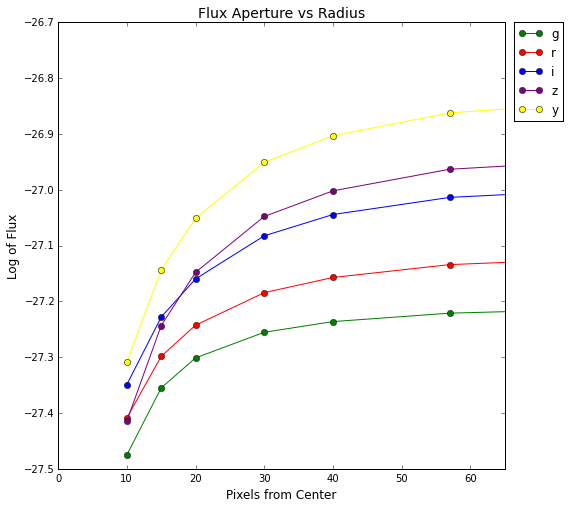

In [19]:
j = 4984 # index of the object in question
g = [g10[j], g15[j], g20[j], g30[j], g40[j], g57[j], g84[j], g118[j], g168[j], g235[j]]
r = [r10[j], r15[j], r20[j], r30[j], r40[j], r57[j], r84[j], r118[j], r168[j], r235[j]]
i = [i10[j], i15[j], i20[j], i30[j], i40[j], i57[j], i84[j], i118[j], i168[j], i235[j]]
z = [z10[j], z15[j], z20[j], z30[j], z40[j], z57[j], z84[j], z118[j], z168[j], z235[j]]
y = [y10[j], y15[j], y20[j], y30[j], y40[j], y57[j], y84[j], y118[j], y168[j], y235[j]]




# two objects?: 4989, 4569, 4937, 4956, 4990, 4994, 5025 (4 objects same dist away from center), 3113, 3130
# unsure: 5016, 4961, 4972, 
# extremely bright quasar?: 4946, 4983, 4988
# kinda extended?: 4973, 4975, 5021, 5034, 5038

# extended: 3111



# poor scan examples: 4565, 4925, 5019, 3116 (holy)
# many stars in view examples: 4566

# 8500, 8510

print RA[j]
print DEC[j]

#print Z[j]

pylab.figure(figsize=(8,8))
plt.title("Flux Aperture vs Radius", size = 14)
plt.plot(pixels, np.log10(g), '-o', c = 'green', label = 'g')
plt.plot(pixels, np.log10(r), '-o', c = 'red', label = 'r')
plt.plot(pixels, np.log10(i), '-o', c = 'blue', label = 'i')
plt.plot(pixels, np.log10(z), '-o', c = 'purple', label = 'z')
plt.plot(pixels, np.log10(y), '-o', c = 'yellow', label = 'y')
plt.xlabel('Pixels from Center', size = 12)
plt.ylabel('Log of Flux', size = 12)
plt.xlim(0,65)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()
#.16'' per pixel

# plot psf intensity vs distance from center (individual pixels)
# get psf model for images too

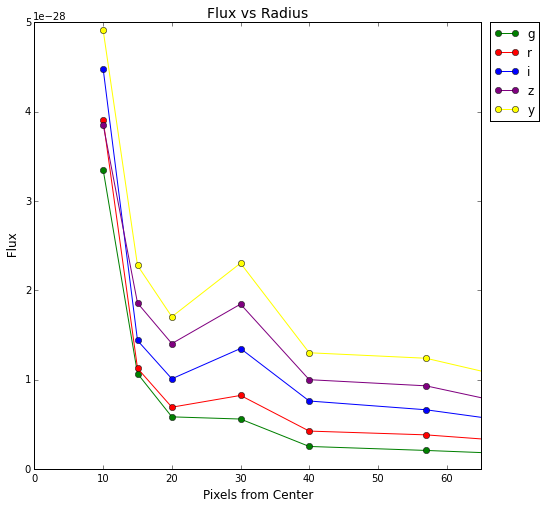

In [20]:
g = [g10[j], g15[j] - g10[j], g20[j] - g15[j], g30[j] - g20[j], g40[j] - g30[j], g57[j] - g40[j],
     g84[j] - g57[j], g118[j] - g84[j], g168[j] - g118[j], g235[j] - g168[j]]
r = [r10[j], r15[j] - r10[j], r20[j] - r15[j], r30[j] - r20[j], r40[j] - r30[j], r57[j] - r40[j],
     r84[j] - r57[j], r118[j] - r84[j], r168[j] - r118[j], r235[j] - r168[j]]

i = [i10[j], i15[j] - i10[j], i20[j] - i15[j], i30[j] - i20[j], i40[j] - i30[j], i57[j] - i40[j],
     i84[j] - i57[j], i118[j] - i84[j], i168[j] - i118[j], i235[j] - i168[j]]

z = [z10[j], z15[j] - z10[j], z20[j] - z15[j], z30[j] - z20[j], z40[j] - z30[j], z57[j] - z40[j],
     z84[j] - z57[j], z118[j] - z84[j], z168[j] - z118[j], z235[j] - z168[j]]

y = [y10[j], y15[j] - y10[j], y20[j] - y15[j], y30[j] - y20[j], y40[j] - y30[j], y57[j] - y40[j],
     y84[j] - y57[j], y118[j] - y84[j], y168[j] - y118[j], y235[j] - y168[j]]



pylab.figure(figsize=(8,8))
plt.title("Flux vs Radius", size = 14)
plt.plot(pixels, (g), '-o', c = 'green', label = 'g')
plt.plot(pixels, (r), '-o', c = 'red', label = 'r')
plt.plot(pixels, (i), '-o', c = 'blue', label = 'i')
plt.plot(pixels, (z), '-o', c = 'purple', label = 'z')
plt.plot(pixels, (y), '-o', c = 'yellow', label = 'y')
plt.xlabel('Pixels from Center', size = 12)
plt.ylabel(' Flux', size = 12)
plt.xlim(0,65)    # limit to 10 arcseconds
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()





#.16'' per pixel

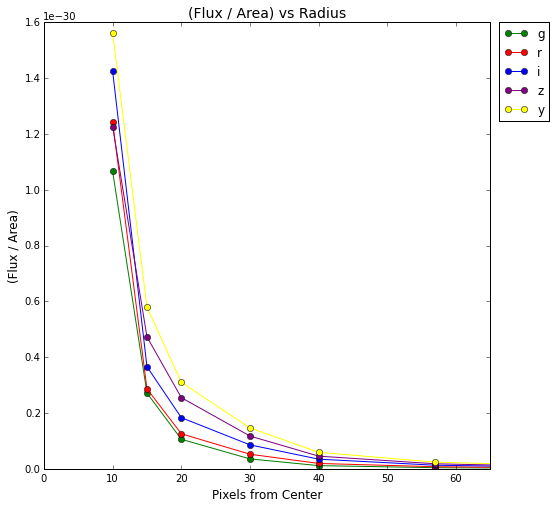

In [21]:
g = [g10[j]/area[0], (g15[j] - g10[j])/area[1], (g20[j] - g15[j])/area[2], (g30[j] - g20[j])/area[3],
     (g40[j] - g30[j])/area[4], (g57[j] - g40[j])/area[5], (g84[j] - g57[j])/area[6], (g118[j] - g84[j])/area[7],
     (g168[j] - g118[j])/area[8], (g235[j] - g168[j])/area[9]]

r = [r10[j]/area[0], (r15[j] - r10[j])/area[1], (r20[j] - r15[j])/area[2], (r30[j] - r20[j])/area[3],
     (r40[j] - r30[j])/area[4], (r57[j] - r40[j])/area[5], (r84[j] - r57[j])/area[6], (r118[j] - r84[j])/area[7],
     (r168[j] - r118[j])/area[8], (r235[j] - r168[j])/area[9]]

i = [i10[j]/area[0], (i15[j] - i10[j])/area[1], (i20[j] - i15[j])/area[2], (i30[j] - i20[j])/area[3],
     (i40[j] - i30[j])/area[4], (i57[j] - i40[j])/area[5], (i84[j] - i57[j])/area[6], (i118[j] - i84[j])/area[7],
     (i168[j] - i118[j])/area[8], (i235[j] - i168[j])/area[9]]


z = [z10[j]/area[0], (z15[j] - z10[j])/area[1], (z20[j] - z15[j])/area[2], (z30[j] - z20[j])/area[3],
     (z40[j] - z30[j])/area[4], (z57[j] - z40[j])/area[5], (z84[j] - z57[j])/area[6], (z118[j] - z84[j])/area[7],
     (z168[j] - z118[j])/area[8], (z235[j] - z168[j])/area[9]]

y = [y10[j]/area[0], (y15[j] - y10[j])/area[1], (y20[j] - y15[j])/area[2], (y30[j] - y20[j])/area[3],
     (y40[j] - y30[j])/area[4], (y57[j] - y40[j])/area[5], (y84[j] - y57[j])/area[6], (y118[j] - y84[j])/area[7],
     (y168[j] - y118[j])/area[8], (y235[j] - y168[j])/area[9]]




pylab.figure(figsize=(8,8))
plt.title("(Flux / Area) vs Radius", size = 14)

plt.plot(pixels, (g), '-o', c = 'green', label = 'g')
plt.plot(pixels, (r), '-o', c = 'red', label = 'r')
plt.plot(pixels, (i), '-o', c = 'blue', label = 'i')
plt.plot(pixels, (z), '-o', c = 'purple', label = 'z')
plt.plot(pixels, (y), '-o', c = 'yellow', label = 'y')
plt.xlabel('Pixels from Center', size = 12)
plt.ylabel('(Flux / Area)', size = 12)
plt.xlim(0,65)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()
#.16'' per pixel

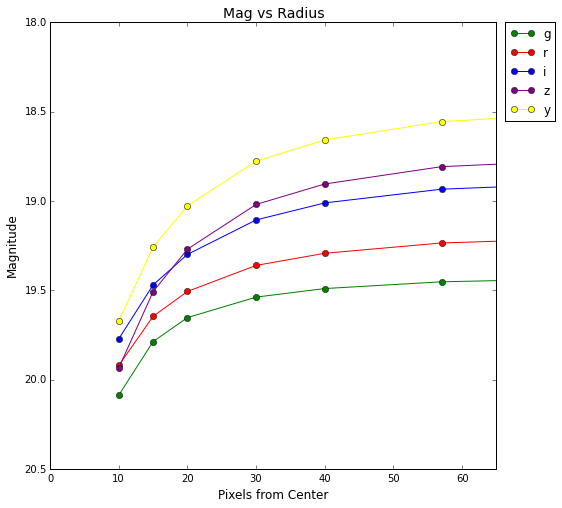

In [22]:

g = [g10[j], g15[j], g20[j], g30[j], g40[j], g57[j], g84[j], g118[j], g168[j], g235[j]]
r = [r10[j], r15[j], r20[j], r30[j], r40[j], r57[j], r84[j], r118[j], r168[j], r235[j]]
i = [i10[j], i15[j], i20[j], i30[j], i40[j], i57[j], i84[j], i118[j], i168[j], i235[j]]
z = [z10[j], z15[j], z20[j], z30[j], z40[j], z57[j], z84[j], z118[j], z168[j], z235[j]]
y = [y10[j], y15[j], y20[j], y30[j], y40[j], y57[j], y84[j], y118[j], y168[j], y235[j]]


g = np.asarray(g)
r = np.asarray(r)
i = np.asarray(i)
z = np.asarray(z)
y = np.asarray(y)


gmag = -5./2. * np.log10(g / (3631. * 1E-23))
rmag = -5./2. * np.log10(r / (3631. * 1E-23))
imag = -5./2. * np.log10(i / (3631. * 1E-23))
zmag = -5./2. * np.log10(z / (3631. * 1E-23))
ymag = -5./2. * np.log10(y / (3631. * 1E-23))


pylab.figure(figsize=(8,8))

plt.title("Mag vs Radius", size = 14)

plt.plot(pixels, (gmag), '-o', c = 'green', label = 'g')
plt.plot(pixels, (rmag), '-o', c = 'red', label = 'r')
plt.plot(pixels, (imag), '-o', c = 'blue', label = 'i')
plt.plot(pixels, (zmag), '-o', c = 'purple', label = 'z')
plt.plot(pixels, (ymag), '-o', c = 'yellow', label = 'y')
plt.gca().invert_yaxis()
plt.xlim(0,65)

plt.xlabel('Pixels from Center', size = 12)
plt.ylabel('Magnitude', size = 12)


plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()


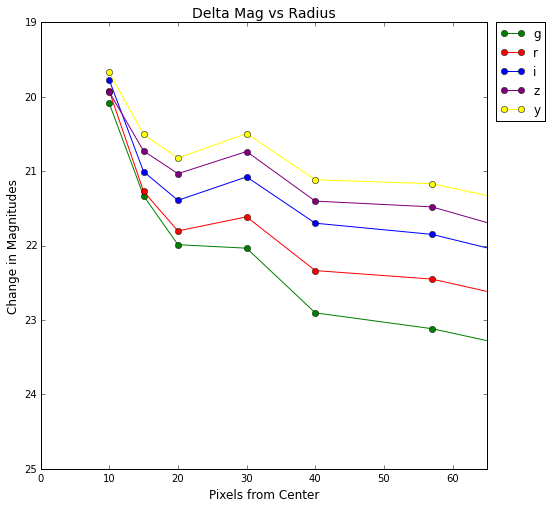

In [26]:
# flux differences 
g = [g10[j], g15[j] - g10[j], g20[j] - g15[j], g30[j] - g20[j], g40[j] - g30[j], g57[j] - g40[j],
     g84[j] - g57[j], g118[j] - g84[j], g168[j] - g118[j], g235[j] - g168[j]]
r = [r10[j], r15[j] - r10[j], r20[j] - r15[j], r30[j] - r20[j], r40[j] - r30[j], r57[j] - r40[j],
     r84[j] - r57[j], r118[j] - r84[j], r168[j] - r118[j], r235[j] - r168[j]]

i = [i10[j], i15[j] - i10[j], i20[j] - i15[j], i30[j] - i20[j], i40[j] - i30[j], i57[j] - i40[j],
     i84[j] - i57[j], i118[j] - i84[j], i168[j] - i118[j], i235[j] - i168[j]]

z = [z10[j], z15[j] - z10[j], z20[j] - z15[j], z30[j] - z20[j], z40[j] - z30[j], z57[j] - z40[j],
     z84[j] - z57[j], z118[j] - z84[j], z168[j] - z118[j], z235[j] - z168[j]]

y = [y10[j], y15[j] - y10[j], y20[j] - y15[j], y30[j] - y20[j], y40[j] - y30[j], y57[j] - y40[j],
     y84[j] - y57[j], y118[j] - y84[j], y168[j] - y118[j], y235[j] - y168[j]]

g = np.asarray(g)
r = np.asarray(r)
i = np.asarray(i)
z = np.asarray(z)
y = np.asarray(y)

# convert flux differences to magnitudes

gdelmag = -5./2. * np.log10(g / (3631. * 1E-23))
rdelmag = -5./2. * np.log10(r / (3631. * 1E-23))
idelmag = -5./2. * np.log10(i / (3631. * 1E-23))
zdelmag = -5./2. * np.log10(z / (3631. * 1E-23))
ydelmag = -5./2. * np.log10(y / (3631. * 1E-23))

gdelmag = gdelmag.tolist()
rdelmag = rdelmag.tolist()
idelmag = idelmag.tolist()
zdelmag = zdelmag.tolist()
ydelmag = ydelmag.tolist()



pylab.figure(figsize=(8,8))

plt.title("Delta Mag vs Radius", size = 14)
plt.plot(pixels, (gdelmag), '-o', c = 'green', label = 'g')
plt.plot(pixels, (rdelmag), '-o', c = 'red', label = 'r')
plt.plot(pixels, (idelmag), '-o', c = 'blue', label = 'i')
plt.plot(pixels, (zdelmag), '-o', c = 'purple', label = 'z')
plt.plot(pixels, (ydelmag), '-o', c = 'yellow', label = 'y')
plt.gca().invert_yaxis()
plt.xlim(0,65)
plt.xlabel('Pixels from Center', size = 12)
plt.ylabel('Change in Magnitudes', size = 12)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()


## Extended Objects



 |Index|RA, DEC|
|---|-------|
|4923 | 
| 4951|
| 4955|
| 4964|
| 4965|
| 4977|
| 4984 (spiral!)|
| 4999| 178.278993827, -0.753540724623|
|5033|178.512539857, 0.531707775203|
|5043|178.553196933, 1.02601264171|





4923, 4951, 4955, 4964, 4965, 4977, 4984 (spiral?)


## Interesting Images



 |Index|RA, DEC| Description |
|---|-------|----------------|
|1776|35.9431049333, -5.12841673716|
|2870 |130.396689655, 2.82468700997| Poor background subtraction |
|2456| 38.0673331111, -4.2275105368 | Nearby galaxy|
|4610 | 141.843212236, 2.73555477639| large quasar|
|2686 | 39.9847870864, -6.90576483524| large quasar|
|8358 | 335.600726518, 1.90822246406| nearby star|
|6420 | 221.071809755, -0.889543450513| nearby star|
|2290 | 37.5360346692, -4.52652912844| nearby galaxies, z = 2.47 |
|4765 | 176.543412213, -1.00301585615| poor background subtraction|
| 26 | 30.2005056027, -6.10541560649| nearby galaxy - no SIMBAD results|
| 1234 |    | extended|









In [9]:
# match the redshifts for each of the quasars
# do difference in magnitudes- but convert to flux, take the difference, convert back to mags
# email help for ssh-ing into tiger-sumire. tiger.princeton.edu you can get into from a cluster.